# Manual Implementation of Deep Learning - TD 1

[Use numpy for all questions]

In [336]:
import numpy as np
import matplotlib.pyplot as plt

## Linear Regression
**We will do a linear regression using backpropagartion.**
*Of course, there is an analyctical solution to this problem, but the techniques used can be generalized to complex models, for which we do not have an analyctical solution to compute the optimal weights.* We forget about activation functions for now because we do not need non-linearity (we are trying to fit a linear function!).

Create $N \in \mathbb{N}$ points of data $x_i, 0 \leq i < N$ with $x_i \in [0,1)$ and associated (noised) output $y_i = a*x_i+b+\epsilon_i$ with $\epsilon_i \approx \mathcal{N}(0,0.01)$. Use the function `np.random.randn`.

Use $a=2$, $b=1$ & $N=100$

In [337]:
# Data Generation
np.random.seed(42)
xs = np.random.rand(100, 1)
ys = 2 * xs + 1 + .1 * np.random.randn(100, 1)

Plot the dots to check it makes sense to use a linear model

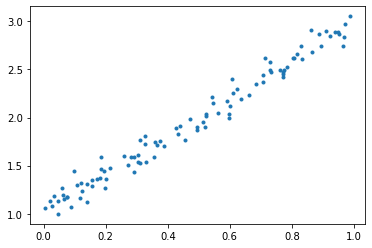

In [338]:
plt.plot(xs, ys, '.')
plt.show()

Initializes parameters $a$ and $b$ randomly

In [339]:
np.random.seed(42)
a = np.random.randn(1)
b = np.random.randn(1)
a,b

(array([0.49671415]), array([-0.1382643]))

Calculate your predictions $\hat{y} = a * x_{train} +b$

In [340]:
yhat = a * xs + b

Calculate the error $err = \hat{y} - y_{train}$ and the MSE loss defined as: $loss = \frac{err^2}{N}$ (dividing by $N$ is not actually necessary)

In [341]:
error = (yhat - ys)
loss = (error ** 2).mean()

Compute the gradients for both $a$ and $b$ parameters

In [342]:
a_grad = 2 * (xs * error).mean()
b_grad = 2 * error.mean()

Update parameters using gradients and the learning rate `lr = 1e-1`

In [343]:
lr = 1e-1
a = a - lr * a_grad
b = b - lr * b_grad
a, b

(array([0.69574465]), array([0.23073016]))

Repeat this for $1000$ epochs and plot error as a function of epoch

In [344]:
n_epochs = 1000

for epoch in range(n_epochs):
    # compute our model's predicted output
    yhat = a * xs + b
    
    # compute the error
    error = (yhat - ys)
    # compute the loss (MSE)
    loss = (error ** 2).mean()
    
    # compute gradients for both a and b parameters
    a_grad = 2 * (xs * error).mean()
    b_grad = 2 * error.mean()
    
    # update parameters using gradients and the learning rate
    a = a - lr * a_grad
    b = b - lr * b_grad

a,b

(array([1.95402224]), array([1.02150984]))

Check that we get the same results as our gradient descent with an analytical linear regression (you may use `sklearn.linear_model.LinearRegression`)

In [345]:
from sklearn.linear_model import LinearRegression
linr = LinearRegression()
linr.fit(xs, ys)
linr.coef_[0], linr.intercept_  # a, b

(array([1.95402268]), array([1.02150962]))

-----

## $XOR$
**We will create a (simple) neural network with 2 layers to fit the $XOR$ function.**
*Of course, this is dumb since the xor function is (much) faster than running a neural network; but the technique can be used to fit complex functions, for which we may not even have an expression.*

Define the $XOR$ function and create some synthetic training data

In [346]:
def xor(x1, x2):
    return (x1 and not x2) or (not x1 and x2)

X_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_train = np.array([[xor(x[0], x[1])] for x in X_train])

print(X_train)
print(y_train)

[[0 0]
 [0 1]
 [1 0]
 [1 1]]
[[0]
 [1]
 [1]
 [0]]


Define the model's architecture and some hyperparameters:
- $10$ hidden units
- learning rate of $0.5$
- 10_000 epochs

In [347]:
# number of hidden units
n_hidden = 10
# learning rate
lr = 0.2
# number of epochs
epochs = 10_000

Define the model's weight matrices and biases.
Depending on how you perform the calculation between one layer and the other of the neural network ($l_{n} = Wl_{n-1} + b_n$ or $l_{n} = l_{n-1}W + b_n$), the number of rows and columns of W might be inverted.

In [348]:
np.random.seed(42)

# weight and bias matrices for the hidden layer
W_hidden = np.random.randn(n_hidden, 2)  # n_hidden rows and two columns, we 
# are therefore doing W*x with x a column vector (to match the slides).
# The same would obviously work with x*W with x a line vector.
b_hidden = np.zeros((n_hidden))  # b_hidden can be considered as a vector, 
# a matrix would work but isn't necessary. It will have to be transposed
# as vectors are line vectors in Python.

print("W_hidden")
print(W_hidden)
print("b_hidden")
print(b_hidden)

# separator
print("\n")

# weight and bias matrices for the output layer
W_out = np.random.randn(1, n_hidden)
b_out = np.zeros((1))

print("W_out")
print(W_out)
print("b_out")
print(b_out)

W_hidden
[[ 0.49671415 -0.1382643 ]
 [ 0.64768854  1.52302986]
 [-0.23415337 -0.23413696]
 [ 1.57921282  0.76743473]
 [-0.46947439  0.54256004]
 [-0.46341769 -0.46572975]
 [ 0.24196227 -1.91328024]
 [-1.72491783 -0.56228753]
 [-1.01283112  0.31424733]
 [-0.90802408 -1.4123037 ]]
b_hidden
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


W_out
[[ 1.46564877 -0.2257763   0.0675282  -1.42474819 -0.54438272  0.11092259
  -1.15099358  0.37569802 -0.60063869 -0.29169375]]
b_out
[0.]


Define the sigmoid ($\sigma (x) = \frac{1}{1+e^{-x}}$) activation function and its derivative: $\sigma (x) * (1-\sigma (x))$.



In [349]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

Define the forward pass of the model

In [350]:
def forward(X):
    # number of samples
    n_samples = X.shape[0]  # n_samples is 4 here
    # hidden layer activations
    hidden_activations = np.zeros((n_samples, W_hidden.shape[0]))
    # output layer activations
    output_activations = np.zeros((n_samples, W_out.shape[0]))
    # loss
    loss = 0
    for i in range(n_samples):
        hidden_activations[i] = sigmoid(np.dot(W_hidden, X[i].T) + b_hidden.T)  # layer 1
        output_activations[i] = sigmoid(np.dot(W_out, hidden_activations[i]) + b_out)  # y_hat
        loss += (y_train[i] - output_activations[i]) ** 2
    return hidden_activations, output_activations, loss

    # It's also important to note that this solution is not the most efficient, 
    # especially when you have a large dataset. But for the sake of clarity,
    # it is more understandable if we iterate over the samples in X to calculate
    # the hidden_activations and output_activations for each sample.

Define the backward pass of the mode.

To determine how parameters will be updated, we need to compute the partial derivatives of the error with regards to each parameter.



Let's compute the derivate with regard to each element of $W_{out}$. $W_{out}$ is a matrix with only one row (because the output is 1D). Which is why we need to compute $\frac{\partial e}{\partial w_{out,1,j}}$ and not $\frac{\partial e}{\partial w_{out,i,j}}$. Let's define the loss we are trying to minimise as $(\widehat{y} - y_{train})^2$.

$\frac{\partial e}{\partial w_{out, 1, j}}(x, W_1, b_1, W_{out}, b_{out})$

$= \frac{\partial e}{\partial \widehat{y}} (\widehat{y} (x, W_1, b_1, W_{out}, b_{out}))) * \frac{\partial \widehat{y}}{\partial w_{out, 1, j}} (x, W_1, b_1, W_{out}, b_{out})$

$= 2*((\widehat{y}-y_{train})) * \frac{\partial \sigma(W_{out}l^1 +b_{out})}{\partial w_{out, 1, j}} (x, W_1, b_1, W_{out}, b_{out})$

$= 2*((\widehat{y}-y_{train})) * \sigma' (W_{out}l^1 + b_{out}) * \frac{\partial W_{out}l^1 +b_{out}}{\partial w_{out, 1, j}} (x, W_1, b_1, W_{out}, b_{out})$

$= 2*((\widehat{y}-y_{train})) * \sigma' (W_{out}l^1 + b_{out}) * \frac{\partial W_{out}l^1}{\partial w_{out, 1, j}} (x, W_1, b_1, W_{out}, b_{out})$

$= 2*((\widehat{y}-y_{train})) * \sigma' (W_{out}l^1 + b_{out}) * l_{j}$

Let's compute the derivative with regard to each element of $b_{out}$ (only one, $j = 1$).

$\frac{\partial e}{\partial b_{out, j}}(x, W_1, b_1, W_{out}, b_{out})$

$= \frac{\partial e}{\partial \widehat{y}} (\widehat{y} (x, W_1, b_1, W_{out}, b_{out}))) * \frac{\partial \widehat{y}}{\partial b_{out,j}} (x, W_1, b_1, W_{out}, b_{out})$

$= 2*((\widehat{y}-y_{train})) * \sigma' (W_{out}l^1 + b_{out}) * \frac{\partial W_{out}l^1 + b_{out}}{\partial b_{out, j}} (x, W_1, b_1, W_{out}, b_{out})$

$= 2*((\widehat{y}-y_{train})) * \sigma' (W_{out}l^1 + b_{out})$

Let's compute the derivative with regard to each element of $b_{hidden}$ ($n_{hidden}$ elements).

$\frac{\partial e}{\partial b_{hidden, j}}(x, W_1, b_1, W_{out}, b_{out})$

$= \frac{\partial e}{\partial \widehat{y}} (\widehat{y} (x, W_1, b_1, W_{out}, b_{out}))) * \frac{\partial \widehat{y}}{\partial b_{hidden,j}} (x, W_1, b_1, W_{out}, b_{out})$

$= 2*((\widehat{y}-y_{train})) * \sigma' (W_{out}l^1 + b_{out}) * \frac{\partial W_{out}l^1 + b_{out}}{\partial b_{hidden, j}} (x, W_1, b_1, W_{out}, b_{out})$

$= 2*((\widehat{y}-y_{train})) * \sigma' (W_{out}l^1 + b_{out}) * \frac{\partial W_{out} (W_{hidden}x + b_{hidden}) + b_{out}}{\partial b_{hidden, j}} (x, W_1, b_1, W_{out}, b_{out})$ 

$= 2*((\widehat{y}-y_{train})) * \sigma' (W_{out}l^1 + b_{out}) * W_{out, j}$ 


We will not show the culcations to get the derivates with regards to $W_{hidden}$ but it really is the same (using the chain rule and being very careful).


In [351]:
def backward(X, y_train, hidden_activations, output_activations):
    # global variables because we are going to change them and we need the
    # change to only be done locally
    global W_hidden, b_hidden, W_out, b_out

    n_samples = X.shape[0]  # n_samples is 4 here
    # update weight matrices and biases

    for i in range(n_samples):
        for j in range(n_hidden):
            W_out[0][j] -= lr * 2 * (output_activations[i] - y_train[i]) * sigmoid_derivative(np.dot(W_out, hidden_activations[i]) + b_out) * hidden_activations[i][j]
        b_out -= lr * 2 * (output_activations[i] - y_train[i]) * sigmoid_derivative(np.dot(W_out, hidden_activations[i]) + b_out)

        for j in range(n_hidden):
            for k in range(2):  # because W_hidden is a matrix n_hidden rows, 2 columns
                W_hidden[j][k] -= lr * 2 * (output_activations[i] - y_train[i]) * sigmoid_derivative(np.dot(W_out, hidden_activations[i]) + b_out) * W_out[0][j] * sigmoid_derivative(np.dot(W_hidden, X[i].T) + b_hidden.T)[j] * X[i][k]
            b_hidden[j] -= lr * 2 * (output_activations[i] - y_train[i]) * sigmoid_derivative(np.dot(W_out, hidden_activations[i]) + b_out) * W_out[0][j]


Performs the forward pass, backward pass, and weight updates for $10,000$ epochs;
in addition:
- print the loss every $10,000$ epochs
- save the losses and plot them in a semilogy

Epoch 0: loss = [1.3328554]
Epoch 1000: loss = [0.05634485]
Epoch 2000: loss = [0.0315016]
Epoch 3000: loss = [0.02094356]
Epoch 4000: loss = [0.01381343]
Epoch 5000: loss = [0.00971074]
Epoch 6000: loss = [0.00728384]
Epoch 7000: loss = [0.00574407]
Epoch 8000: loss = [0.00470195]
Epoch 9000: loss = [0.00395866]


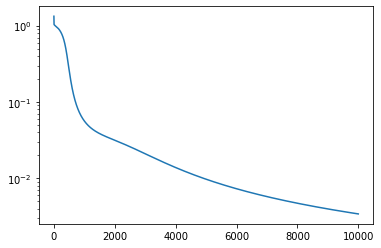

In [352]:
losses = np.zeros(epochs)
for epoch in range(epochs):
    # train
    hidden_activations, output_activations, loss = forward(X_train)
    backward(X_train, y_train, hidden_activations, output_activations)
    # save & print the loss
    losses[epoch] = loss
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}: loss = {loss}")
# semilogy of the loss
plt.semilogy(losses)
plt.show()

Test your model & plot its outputs

[[0.03540787]
 [0.96868017]
 [0.97319289]
 [0.0212762 ]]


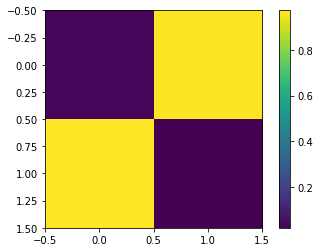

In [353]:
_, y_pred, _ = forward(X_train)
print(y_pred)
plt.imshow(y_pred.reshape(2,2))
plt.colorbar()
plt.show()

Re-build your model using $ReLU$ activation instead of sigmoid (same number of hidden units, you may need to adjust the learning rate to $0.01$); which activation function converges the fastest?

If one activation function converges faster, does that mean it is better? No, to determine which activation function is better you would need to compare the loss on the validation set (our testing set). And then use the test set to announce your unbiased loss. 

Epoch 0: loss = [2.36597838]
Epoch 1000: loss = [0.01512198]
Epoch 2000: loss = [0.00182166]
Epoch 3000: loss = [0.00018429]
Epoch 4000: loss = [1.74385852e-05]
Epoch 5000: loss = [1.61554701e-06]
Epoch 6000: loss = [1.48663182e-07]
Epoch 7000: loss = [1.36519488e-08]
Epoch 8000: loss = [1.25289573e-09]
Epoch 9000: loss = [1.14960983e-10]


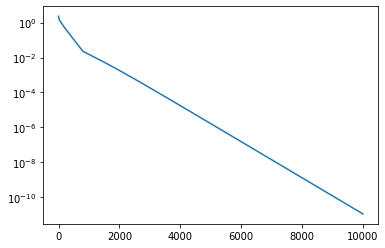

In [354]:
# weight and bias matrices for the hidden layer
W_hidden = np.random.randn(n_hidden, 2)  # n_hidden rows and two columns, we 
# are therefore doing W*x with x a column vector (to match the slides).
# The same would obviously work with x*W with x a line vector.
b_hidden = np.zeros((n_hidden))  # b_hidden can be considered as a vector, 
# a matrix would work but isn't necessary. It will have to be transposed
# as vectors are line vectors in Python.

# weight and bias matrices for the output layer
W_out = np.random.randn(1, n_hidden)
b_out = np.zeros((1))


# number of hidden units
n_hidden = 10
# learning rate
lr = 0.001
# number of epochs
epochs = 10_000


# activation function
def relu(x):
    return x.clip(0,None)
# and its derivative
def relu_derivative(x):
    return 1*(x>=0)


def forward(X):
    # number of samples
    n_samples = X.shape[0]  # n_samples is 4 here
    # hidden layer activations
    hidden_activations = np.zeros((n_samples, W_hidden.shape[0]))
    # output layer activations
    output_activations = np.zeros((n_samples, W_out.shape[0]))
    # loss
    loss = 0
    for i in range(n_samples):
        hidden_activations[i] = relu(np.dot(W_hidden, X[i].T) + b_hidden.T)  # layer 1
        output_activations[i] = relu(np.dot(W_out, hidden_activations[i]) + b_out)  # y_hat
        loss += (y_train[i] - output_activations[i]) ** 2
    return hidden_activations, output_activations, loss

    # It's also important to note that this solution is not the most efficient, 
    # especially when you have a large dataset. But for the sake of clarity,
    # it is more understandable if we iterate over the samples in X to calculate
    # the hidden_activations and output_activations for each sample.

def backward(X, y_train, hidden_activations, output_activations):
    # global variables because we are going to change them and we need the
    # change to only be done locally
    global W_hidden, b_hidden, W_out, b_out

    n_samples = X.shape[0]  # n_samples is 4 here
    # update weight matrices and biases

    for i in range(n_samples):
        for j in range(n_hidden):
            W_out[0][j] -= lr * 2 * (output_activations[i] - y_train[i]) * relu_derivative(np.dot(W_out, hidden_activations[i]) + b_out) * hidden_activations[i][j]
        b_out -= lr * 2 * (output_activations[i] - y_train[i]) * relu_derivative(np.dot(W_out, hidden_activations[i]) + b_out)

        for j in range(n_hidden):
            for k in range(2):  # because W_hidden is a matrix n_hidden rows, 2 columns
                W_hidden[j][k] -= lr * 2 * (output_activations[i] - y_train[i]) * relu_derivative(np.dot(W_out, hidden_activations[i]) + b_out) * W_out[0][j] * relu_derivative(np.dot(W_hidden, X[i].T) + b_hidden.T)[j] * X[i][k]
            b_hidden[j] -= lr * 2 * (output_activations[i] - y_train[i]) * relu_derivative(np.dot(W_out, hidden_activations[i]) + b_out) * W_out[0][j]


losses = np.zeros(epochs)
for epoch in range(epochs):
    # train
    hidden_activations, output_activations, loss = forward(X_train)
    backward(X_train, y_train, hidden_activations, output_activations)
    # save & print the loss
    losses[epoch] = loss
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}: loss = {loss}")
# semilogy of the loss
plt.semilogy(losses)
plt.show()


Now launch this code. What happens? Why?

Epoch 0: loss = [2.]
Epoch 1000: loss = [2.]
Epoch 2000: loss = [2.]
Epoch 3000: loss = [2.]
Epoch 4000: loss = [2.]
Epoch 5000: loss = [2.]
Epoch 6000: loss = [2.]
Epoch 7000: loss = [2.]
Epoch 8000: loss = [2.]
Epoch 9000: loss = [2.]


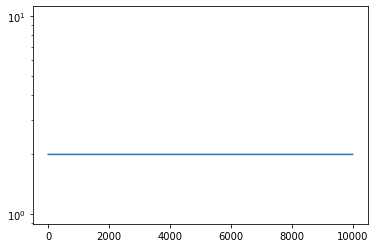

In [357]:
np.random.seed(44)

# weight and bias matrices for the hidden layer
W_hidden = np.random.randn(n_hidden, 2)  # n_hidden rows and two columns, we 
# are therefore doing W*x with x a column vector (to match the slides).
# The same would obviously work with x*W with x a line vector.
b_hidden = np.zeros((n_hidden))  # b_hidden can be considered as a vector, 
# a matrix would work but isn't necessary. It will have to be transposed
# as vectors are line vectors in Python.

# weight and bias matrices for the output layer
W_out = np.random.randn(1, n_hidden)
b_out = np.zeros((1))


# number of hidden units
n_hidden = 10
# learning rate
lr = 0.001
# number of epochs
epochs = 10_000


# activation function
def relu(x):
    return x.clip(0,None)
# and its derivative
def relu_derivative(x):
    return 1*(x>=0)


def forward(X):
    # number of samples
    n_samples = X.shape[0]  # n_samples is 4 here
    # hidden layer activations
    hidden_activations = np.zeros((n_samples, W_hidden.shape[0]))
    # output layer activations
    output_activations = np.zeros((n_samples, W_out.shape[0]))
    # loss
    loss = 0
    for i in range(n_samples):
        hidden_activations[i] = relu(np.dot(W_hidden, X[i].T) + b_hidden.T)  # layer 1
        output_activations[i] = relu(np.dot(W_out, hidden_activations[i]) + b_out)  # y_hat
        loss += (y_train[i] - output_activations[i]) ** 2
    return hidden_activations, output_activations, loss

    # It's also important to note that this solution is not the most efficient, 
    # especially when you have a large dataset. But for the sake of clarity,
    # it is more understandable if we iterate over the samples in X to calculate
    # the hidden_activations and output_activations for each sample.

def backward(X, y_train, hidden_activations, output_activations):
    # global variables because we are going to change them and we need the
    # change to only be done locally
    global W_hidden, b_hidden, W_out, b_out

    n_samples = X.shape[0]  # n_samples is 4 here
    # update weight matrices and biases

    for i in range(n_samples):
        for j in range(n_hidden):
            W_out[0][j] -= lr * 2 * (output_activations[i] - y_train[i]) * relu_derivative(np.dot(W_out, hidden_activations[i]) + b_out) * hidden_activations[i][j]
        b_out -= lr * 2 * (output_activations[i] - y_train[i]) * relu_derivative(np.dot(W_out, hidden_activations[i]) + b_out)

        for j in range(n_hidden):
            for k in range(2):  # because W_hidden is a matrix n_hidden rows, 2 columns
                W_hidden[j][k] -= lr * 2 * (output_activations[i] - y_train[i]) * relu_derivative(np.dot(W_out, hidden_activations[i]) + b_out) * W_out[0][j] * relu_derivative(np.dot(W_hidden, X[i].T) + b_hidden.T)[j] * X[i][k]
            b_hidden[j] -= lr * 2 * (output_activations[i] - y_train[i]) * relu_derivative(np.dot(W_out, hidden_activations[i]) + b_out) * W_out[0][j]


losses = np.zeros(epochs)
for epoch in range(epochs):
    # train
    hidden_activations, output_activations, loss = forward(X_train)
    backward(X_train, y_train, hidden_activations, output_activations)
    # save & print the loss
    losses[epoch] = loss
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}: loss = {loss}")
# semilogy of the loss
plt.semilogy(losses)
plt.show()


It gets stuck at a loss of 2.. 

It's important to understand that the initialization of the weights and biases can greatly affect the training of a neural network. If the initialization is not done correctly, it can lead to the model getting stuck and not converging. In this case, it appears that the gradients are reaching a value of zero, which means that none of the weights are updating from one iteration to the next. This results in neither the loss nor the parameters changing, and the network not being able to converge.